# Daftar isi

1. Pendahuluan : Menemukan Game Paling Potensial

    1.1 Tujuan

    1.2 Tahapan
    
2. Eksplorasi Data
    
    2.1 Memperbaiki Data

3. Analisis

4. Uji Hipotesis

5. Kesimpulan

    
    

# 1.Menemukan Game Paling Potensial

Toko daring 'Ice' merupakan toko yang  menjual game dari seluruh dunia. Seiring dengan berkembangnya teknologi, Toko daring 'Ice' sudah mulai beradaptasi dengan platform online.
Data terkait mengenai pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game mudah ditemukan di internet. Melakukan identifikasi dengan menganalisa informasi yang ada pada internet bisa menjadi salah satu opsi untuk menentukan apakah suatu game dikatakan berhasil atau tidak. Hal ini memberikan informasi mengenai game yang paling potensian sehingga Toko daring 'Ice' bisa memaksimalkan kampanye iklannya.

## 1.1 Tujuan

Tujuan dari studi kasus berikut adalah mengidentifikasi pola-pola yang menentukan sebuah game dapat dikatakan berhasil atau tidak dengan harapan untuk menemukan game yang paling berpotensial untuk membuat rencana iklan

## 1.2 Tahapan

Sumber data penelitian ini adalah ESRB yang merupakan singkatan dari Entertaiment Software Rating Board. ESRB merupakan organisai regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti remaja atau dewasa. Penelitian ini terdiri dari beberapa tahapan yaitu tahapan pertama adalah eksplorasi data yaitu memuat semua library dan file yang dibutuhkan untuk selanjutnya dipelajari untuk menentukan perbaikan dan peningkatan kualitas data. Tahapan analisis adalah proses selanjutnya yaitu mempelajari bagaimana distribusi data secara statistik dan membuat visualisasinya agar pola distribusi lebih mudah dipelajari. Untuk tahapan terakhir adalah proses uji analisis dengan menerapakan uji hipotesis untuk membuktikan bagaimana korelasi data apakah sesuai dengan rumusan masalah yang dibuat.

# 2. Eksplorasi Data

In [116]:
#Muat semua library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [117]:
#Muat file ke dalam dataframe

try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [118]:
#Menampilkan data

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [119]:
#Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [120]:
#Menampilkan informasi statistik
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## 2.1 Memperbaiki Data

Semua tahapan awal sudah dilakukan mulai dari memuat library hingga proses menampilkan sampel data. Dari hasil pengamatan terlihat bahwa nama kolom menggunakan kapital ini perlu dilakukan konversi untuk keseragaman format data. Beberapa kolom menggunakan tipe yang kurang tepat, ini juga bisa membuat proses agregasi data tidak optimal. Selanjutnya dari jumlah baris, indikasi adanya beberapa nilai data yang hilang. Beberapa hasil pengamata diatas bersifat sementara, tidak menutup kemungkinan melakukan perbaikan di tahap selanjutnya.

In [121]:
#Merubah semua kolom menjadi huruf kecil

data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [122]:
#menghitung total dan persentase dari missing value
total = data.isna().sum().sort_values(ascending=False)
percentage = ((data.isna().sum()/data.isna().count())*100).sort_values(ascending=False)



In [123]:
#menampilkan tabel dari missing value
missing_data = pd.concat([total,percentage], axis= 1, keys=['total','percentage'])
missing_data

,total,percentage
critic_score,8578,51.319174
rating,6766,40.478612
user_score,6701,40.089740
year_of_release,269,1.609333
name,2,0.011965
genre,2,0.011965
platform,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000


Tabel missing data menunjukan total dari missing value dan berapa persentasenya di setiap kolom. Pada studi kasus ini, ada dua pendekatan yang dilakukan untuk mengatasi missing value yaitu dengan menghapus dan membuat model imputasi. Pemilihan penghapusan setidaknya dilakukan kepada proporsi data yang terhitung kecil jika tidak dapat merubah informasi secara signifikan. Berdasarkan penjelasan tersebut maka akan dilakukan penghapusan missing value pada kolom name dan genre. Untuk kolom yang lain perlu dilakukan pengamatan terlebih dahulu apakah terdapat opsi terbaik.

In [124]:
#Menghapus missing value pada kolom name dan genre
data.dropna(
    subset = ['name','genre'], 
    how='any', 
    inplace=True
    )
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

name dan genre sudah menunjukan bebas dari adanya missing value. Selanjutnya adalah mengatasi missing value pada pada kolom yang memiliki nilai numerik. Kondisi ini seharusnya bisa diatasi dengan menerapkan imputasti ke nilai data yang hilang. Model imputasi yang digunakan adalah dengan menggunakan nilai median dari kolom data yang hilang. Pemilihan nilai median merupakan opsi terbaik ketika data memiliki nilai outlier yang tinggi. Tahap selanjutnya adalah membuat model imputasi berdasarkan platform game. 

In [125]:
#membuat dataframe year_of_release berdasarkan platform

year_of_release = data.groupby('platform')['year_of_release'].median()

In [126]:
#membuat model imputasi

def median_year(row):
    if np.isnan(row['year_of_release']):
        return year_of_release.get(row['platform'])
        
    return row['year_of_release']

In [127]:
#mengatasi missing value pada year_of_release

data['year_of_release'] = data.apply(median_year, axis=1)

In [128]:
#mengganti tipe data
data['year_of_release'] = data['year_of_release'].astype('int')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### critic_score

In [130]:
#membuat dataframe critic_score berdasarkan platform

critic_score = data.groupby('platform')['critic_score'].median()

In [131]:
#membuat model imputasi

def median_score(row):
    if np.isnan(row['critic_score']):
        return critic_score.get(row['platform'])
        
    return row['critic_score']

In [132]:
#mengatasi missing value pada critic_score

data['critic_score'] = data.apply(median_score, axis=1)

In [133]:
data['critic_score'] = data['critic_score'].fillna(data['critic_score'].median())

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### user_score

In [135]:
#eksplorasi data user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Pada saat melakukan eksplorasi pada kolom user_score terdapat nilai 'tbd' pada barisnya. Hal ini mengakibatkan terhambatnya proses untuk membuat dataframe berupa nilai median sehingga perlu dilakukan penggantian kepada nilai ini dengan metode replace. Nilai tersebut akan dijadikan not a number atau missing value, untuk selanjutnya dilakukan imputasi seperti kolom sebelumnya.

In [136]:
#memperbaiki data

data['user_score'] = data['user_score'].replace({'tbd' : np.nan})
data['user_score'] = data['user_score'].astype('float')

data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [137]:
#membuat dataframe user_score berdasarkan platform

user_score = data.groupby('platform')['user_score'].median()

In [138]:
#membuat model imputasi

def score_by_platform(row):
    if np.isnan(row['user_score']):
        return user_score.get(row['platform'])
        
    return row['user_score']

In [139]:
#mengatasi missing value pada user_score

data['user_score'] = data.apply(score_by_platform, axis=1)

In [140]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.0,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,70.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15655,Super Dodge Ball,NG,1995,Sports,0.00,0.00,0.02,0.00,70.0,NaN,NaN
15788,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.00,0.00,0.02,0.00,70.0,NaN,NaN
16207,Rock N' Roll Racing,SNES,1993,Racing,0.00,0.00,0.01,0.00,70.0,NaN,NaN
16693,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.00,70.0,NaN,NaN


In [141]:
data['user_score'] = data['user_score'].fillna(data['user_score'].median())

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### rating

In [143]:
#membuat dataframe rating berdasarkan platform

rating = data.groupby('genre')['rating'].agg(pd.Series.mode)

In [144]:
#eksplorasi data rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [145]:
#membuat model imputasi

def rating_by_genre(row):
    if pd.isna(row['rating']):
        return rating.get(row['genre'])
        
    return row['rating']

In [146]:
#mengatasi missing value pada rating

data['rating'] = data.apply(rating_by_genre, axis=1)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [148]:
#tampilkan data
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.5,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70.0,7.5,T


In [149]:
#menghitung total penjualan


data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.5,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70.0,7.5,T,31.38


Setelah memastikan dari tampilan data sudah dilakukan perbaikan serta bebas dari missing value tahapan selanjutnya adalah proses analisis. Proses ini bertujuan untuk mendapatkan bgaimana distribusi data berdasarkan kategori yang diinginkan. Sebelum melangkah ke tahapan ini, pastikan untuk menghitu berapa total penjualan dari setiap game dimana data ini akan digunakan untuk mengukur bagaimana kempampuan setiap game untuk memberikan penghasilan

# Analisis

Pada proses analisis akan dilakukan filter data berdasarkan tahun kemunculan game. Bagaimana distribusi game yang berdasarkan tahun release akan dipelajari melalui diagram batang. Dari diagram tersebut akan menunjukan berapa game yang diluncurkan pada rentang tahun yang dimiliki oleh data ini

In [150]:
#menampilkan jumlah games berdasarkan tahun release
group_games_by_years = data.groupby('year_of_release').agg({'name': 'count'})
group_games_by_years.head()

,name
year_of_release,
1980,9
1981,46
1982,53
1983,17
1984,14


<Axes: xlabel='year_of_release'>

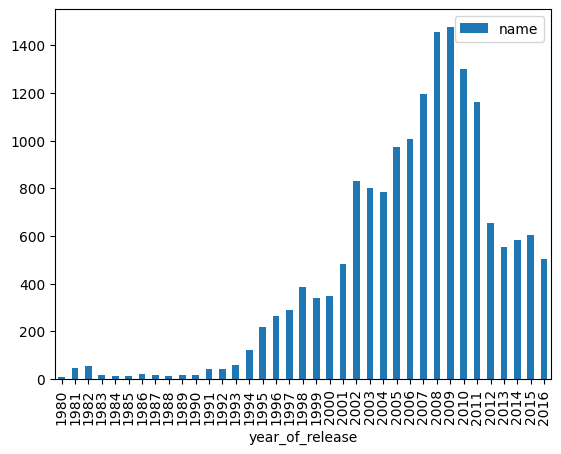

In [151]:
#tampilkan diagram batang

group_games_by_years.plot.bar()


Dari tampilan diagram batang berikut menunjukan berapa jumlah games yang release dari tahun 1980 hingga 2016. Pada periode tahun 2008 dan 2009 merupakan puncak produksi dimana tahun tersebut banyak game yang di release ke publik. Setelah periode tersebut terjadi penurunan yg cukup tinggi hingga tahun 2013 dan seterusnya perkembangan produksi game masih tergolong stagnan. Tahapan selanjutnya adalah membuat data yang distribusinya berdasarkan platform untuk melihat informasi apa yang diberikan dari perkembangan industri games berdasarkan platform. Data tersebut akan memberikan informasi lima platform game dengan penjualan tertinggi juga akan menggambarkan bagaimana historis penjualan dari setiap tahun serta game apa saya yang dulu popolur dan sekarang hampir tidak menghasilkan penjualan.

In [152]:
#penjualan berdasarkan platform
sales_by_platform = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False)
sales_by_platform.head()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [153]:
#membuat model distribusi penjualan
def sales_distribution(data,platform):
    row = data[data['platform'] == platform].groupby('year_of_release').agg({'total_sales':'sum'})
    row.plot(kind = 'bar')
    


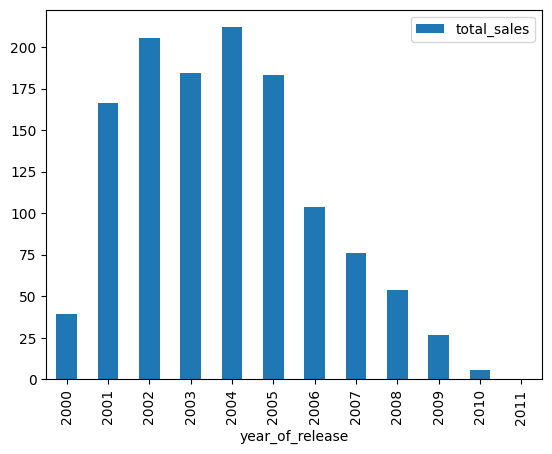

In [154]:
#Penjualan PS2
sales_distribution(data,'PS2')

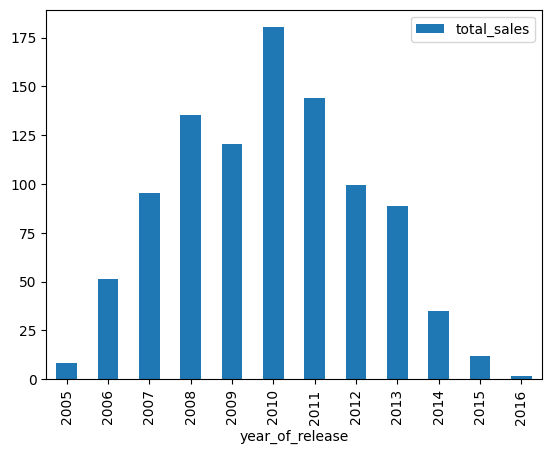

In [155]:
#penjualan x360
sales_distribution(data,'X360')

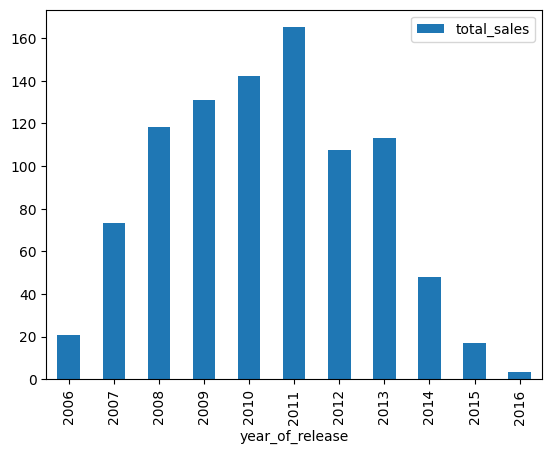

In [156]:
#penjualan PS3
sales_distribution(data,'PS3')

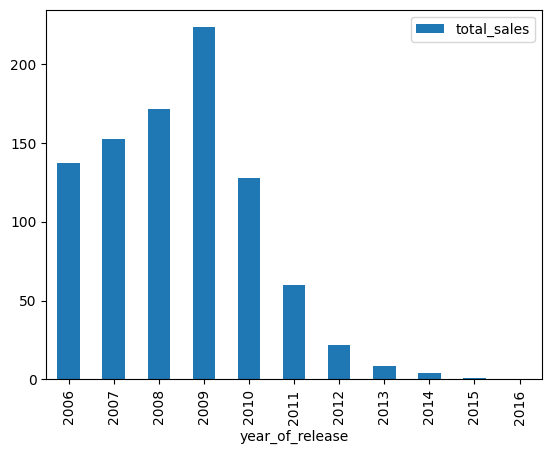

In [157]:
sales_distribution(data,'Wii')

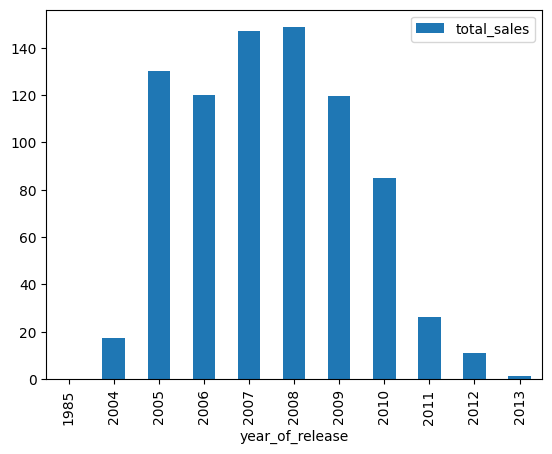

In [158]:
sales_distribution(data,'DS')

Secara umum dari tampilan liman platform tersebut memiliki titip puncak penjualan dan penurunan. Peningkatan penjualan paling tinggi dimiliki oleh Playstation2 yang berhasil mengumpulkan penjualan kurang lebih 150 juta usd pada periode 2000-2001. Sedangkan angka penurunan penjualan tertinggi dimiliki oleh Wii dengan penurununan mencapai 100 juta usd pada periode 2009-2010. Distribusi data pada game Playstation2 hampir tidak memiliki penjualan dimana hal ini merupakan penurunan yang terjadi pada game yang dulunya merupakan platform yang sangat populer. Oleh karena itu, perlu dilakukan spesifikasi tahun release dimana keputusan yang diambil adalah melihat perkembangan game dari sepuluh tahun yang lalu.

In [159]:
#data game dari tahun 2006-2016
new_data = data[data['year_of_release'] >= 2006]
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,70.0,8.0,E,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,73.0,7.1,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.0,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.6,E,0.01


In [160]:
#total penjualan
group_game_by_new_data = new_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False)
group_game_by_new_data.head()

,total_sales
platform,
X360,963.17
PS3,939.65
Wii,907.51
DS,658.69
PS4,314.14


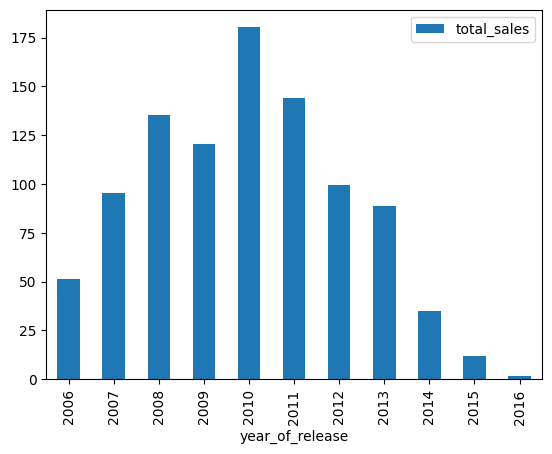

In [161]:
#penjualan Xbox360
sales_distribution(new_data,'X360')

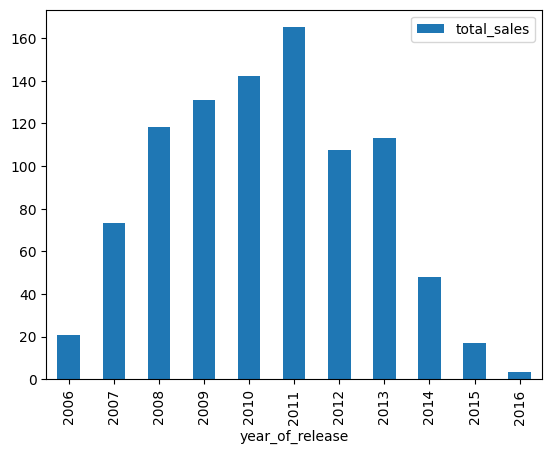

In [162]:
#penjualan playstation3
sales_distribution(new_data,'PS3')

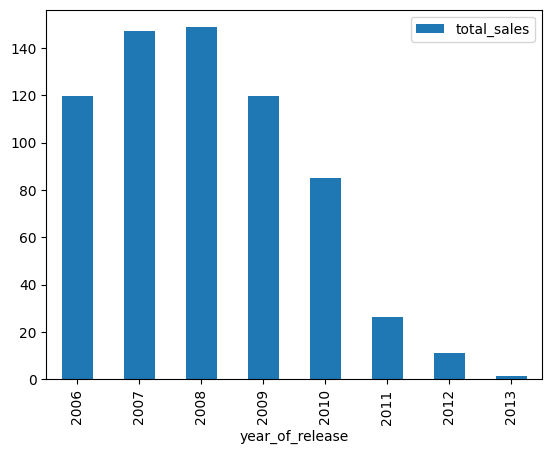

In [163]:
#penjualan Nitendo DS
sales_distribution(new_data,'DS')

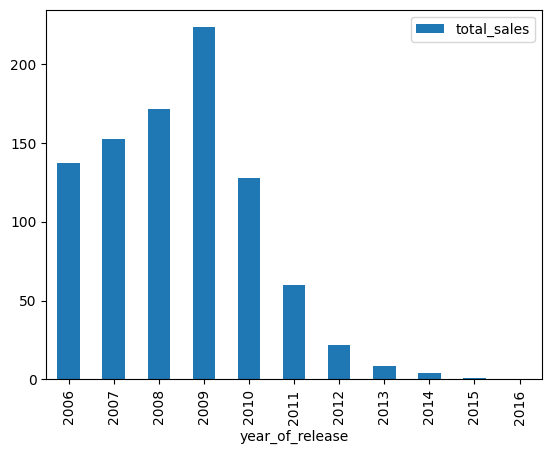

In [164]:
#penjualan Wii
sales_distribution(new_data,'Wii')

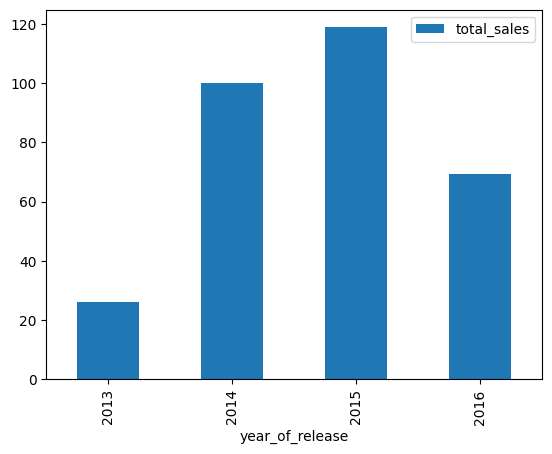

In [165]:
#penjualan PS4
sales_distribution(new_data,'PS4')

In [166]:
#lima peringkat tertinggi 
top_platform = new_data[new_data['platform'].isin(['X360','PS3', 'Wii','DS','PS4'])]
top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [167]:
#tampilan nilai median dan rata-rata dari game
top_platform.groupby('platform')['total_sales'].agg({'median','mean'})

,median,mean
platform,,
DS,0.10,0.327870
PS3,0.27,0.705973
PS4,0.20,0.801378
Wii,0.19,0.687508
X360,0.27,0.774252


Berdasarkan tabel diatas menunjukan bahwa Playstation 4 memiliki rata-rata tertinggi. Namun jika dilihat dari pertumbuhan Xbox 360 dan Playstation 3 lebih terlihat meyakinkan berdasarkan lamanya periode yang kedua platform itu miliki. Pada studi kasus ini, Xbox 360 akan menjadi pilihan untuk dipelajari bagaimana potensi penjualan untuk kedepannya.

<Axes: xlabel='total_sales', ylabel='platform'>

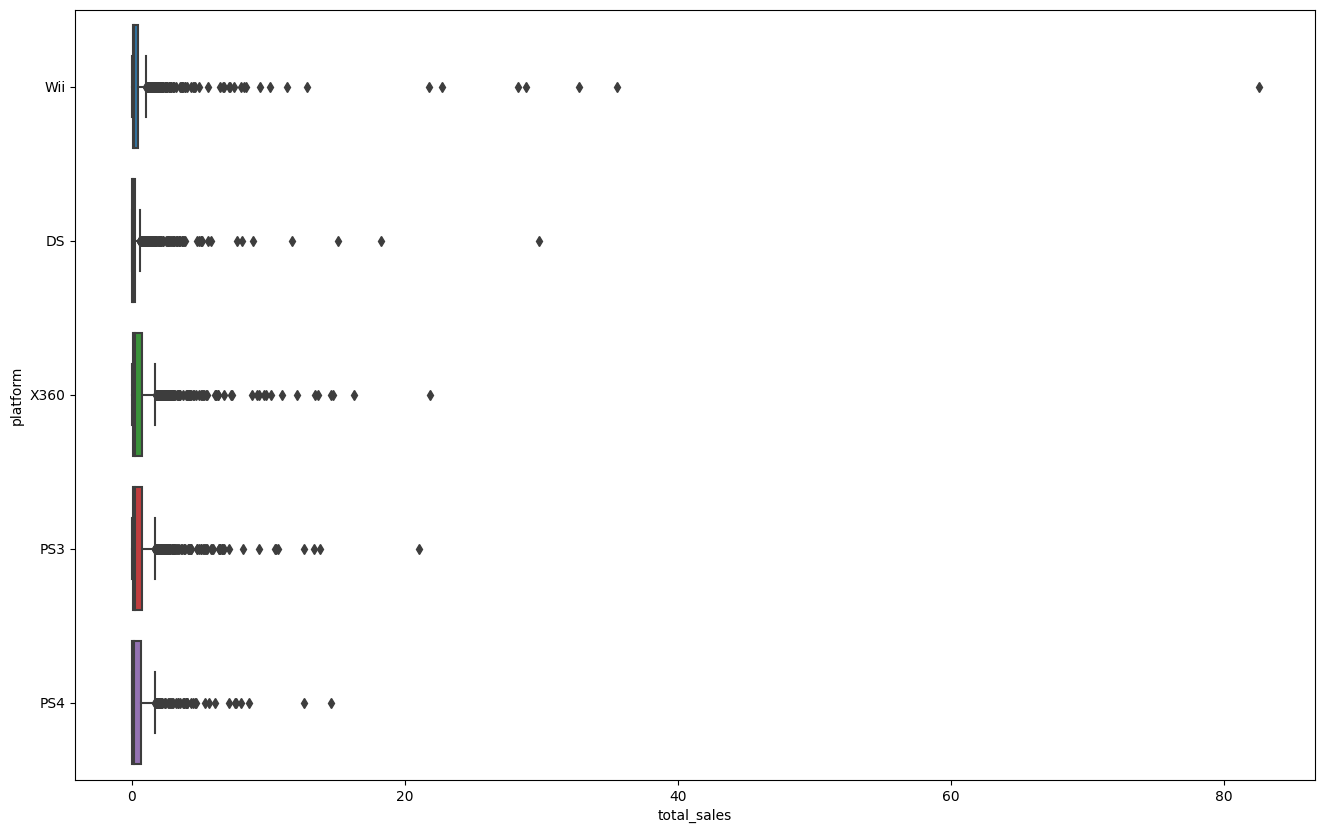

In [168]:
#tampilan boxplot

plt.figure(figsize=(16,10))
sns.boxplot(data = top_platform, x = 'total_sales', y='platform')


Dari tampilan boxplot diatas menunjukan nilai tengan yang dimiliki oleh setiap relatif platform tidak jauh berbeda. Titik-titik terluar juga menunjukan setiap platform memiliki nilai outlier sehingga bisa mempengaruhi distribusi nilai rata-ratanya. Berdasarkan tampilan diatas platform Wii memiliki outlier dengan tingkat penjualan tertinggi. Selanjutnya adalah melihat bagaimana penyebaran data dari Xbox 360 apakakah memilikii korelasi dengan penilaian yang diberikan pengguna dan kritikus games. Hal ini bisa diamati dengan menggunakan grafik scatter plot untuk mengamati sebaran data dari titik-titik yang dimiliki.

In [169]:
#filter data berdasarkan platform Xbox 360
x_360 = new_data[new_data['platform'] == 'X360']

<Axes: xlabel='user_score', ylabel='total_sales'>

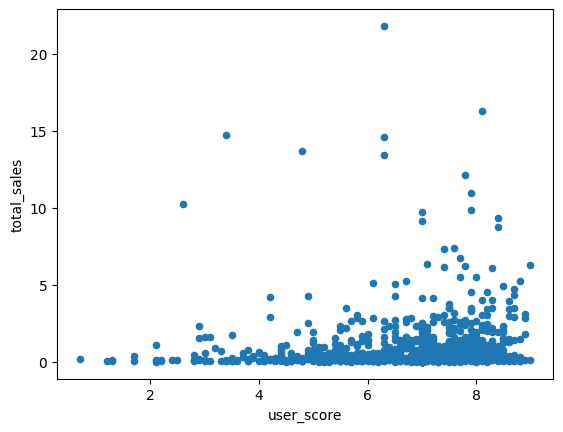

In [170]:
#tamilan scatterplot dari skor yang diberikan pengguna
x_360.plot.scatter(y='total_sales',x='user_score')

<Axes: xlabel='critic_score', ylabel='total_sales'>

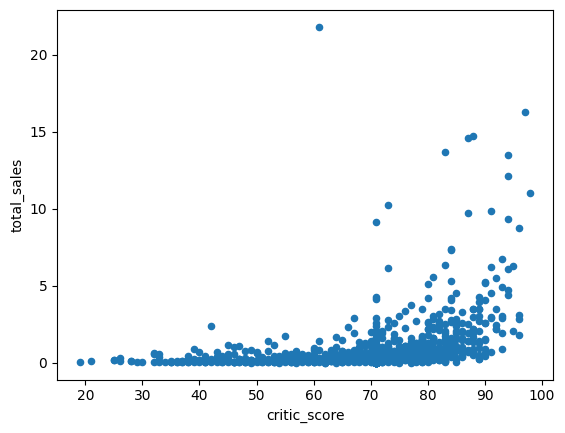

In [171]:
#tampilan scatter plot dari skor diberikan kritikus
x_360.plot.scatter(y='total_sales',x='critic_score')

In [172]:
#tampilan total penjualan berdasarkan genre
sales_by_genre = new_data.groupby('genre').agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False)
sales_by_genre

,total_sales
genre,
Action,1135.62
Sports,800.11
Shooter,722.92
Misc,563.42
Role-Playing,523.49
Racing,301.07
Platform,280.30
Simulation,222.27
Fighting,188.68


<Axes: xlabel='genre'>

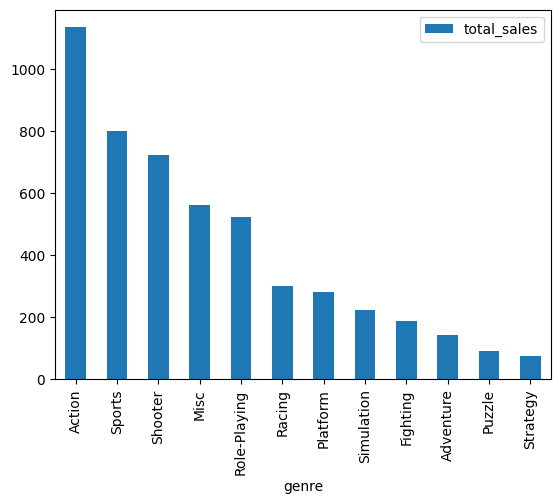

In [173]:
#tampilan grafik patang penjualan game berdasarkan game
sales_by_genre.plot.bar()


Berdasarkan tampilan scatter plot memberikan bagaimana korelasi penilaian dari pengguna game dan kritikus game. Skor yang diberikan oleh Pengguna dan kritikus pada dasarnya memiliki korelasi yang lemah terhapap tingkat penjualan. Hal ini ditunjukan oleh persebaran titik yang berkumpul di sisi kanan dimana memberikan informasi bahwa setiap pertambahan skor yang diberikan oleh pengguna dan kritikus tidak menjadikan penjualan games bertambah secara dramatis. Informasi lain juga bisa dilihat berdasarkan genre game yang menunjukan bahwa game bertemakan action merupakan yang paling populer sedangkan game bergenre strategi paling sedikit tingkat penjualannya.

In [174]:
#Tampilkan sampel data
new_data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Berikut merupakan tampilan data setelah data untuk menunjukan penjualan pada tipa area yaitu Amerika Utara,Eropa,Jepang dan Wilayah lain. Pada tahap ini akan melakukan analisis data terhadap kinerja penjualan dari setiap wilayah. Informasi yang diharapkan dari tahapan ini adalah beberapa platform dan jenis permainan yang populer dari setiap wilayah. Informasi lain yang perlu dilakukan bagaimana korelasi dari skor terhadap penjualan di beberapa wilayah berikut

In [176]:
#tampilan penjulan berdasarkan wilayah Amerika Utara
na_data = new_data.groupby(['platform','genre']).agg({'na_sales':'sum','user_score':'sum','critic_score': 'sum'}).reset_index().sort_values('na_sales', ascending= False)
na_data

,platform,genre,na_sales,user_score,critic_score
150,X360,Shooter,171.71,1359.80,13957.0
128,Wii,Sports,149.72,1819.10,16749.0
142,X360,Action,140.61,2180.00,21590.0
70,PS3,Action,121.47,2649.70,26782.0
121,Wii,Misc,118.82,1955.25,17986.0
...,...,...,...,...,...
157,XB,Misc,0.02,8.00,61.0
115,PSV,Simulation,0.01,30.40,284.0
13,DC,Shooter,0.00,8.80,88.0
12,DC,Adventure,0.00,8.80,88.0


In [177]:
#filter data berdasarkan platform X360
x360_data= na_data[na_data['platform'] == 'X360']
x360_data

,platform,genre,na_sales,user_score,critic_score
150,X360,Shooter,171.71,1359.8,13957.0
142,X360,Action,140.61,2180.0,21590.0
152,X360,Sports,88.86,1362.5,14759.0
145,X360,Misc,63.66,853.6,8779.0
149,X360,Role-Playing,44.75,526.5,5371.0
148,X360,Racing,31.51,682.2,7110.0
144,X360,Fighting,24.31,436.1,4471.0
151,X360,Simulation,8.51,274.9,2649.0
143,X360,Adventure,8.44,322.2,3247.0
153,X360,Strategy,6.50,194.8,2011.0


<Axes: xlabel='user_score', ylabel='na_sales'>

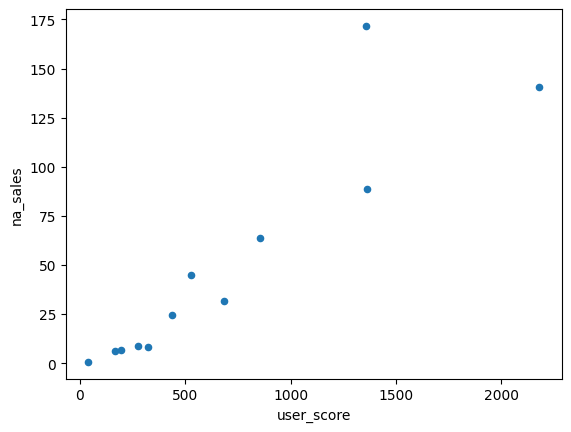

In [178]:
#tampilan scatterplot dari skor yang diberikan pengguna
wii_data.plot.scatter(y='na_sales',x='user_score')

<Axes: xlabel='critic_score', ylabel='na_sales'>

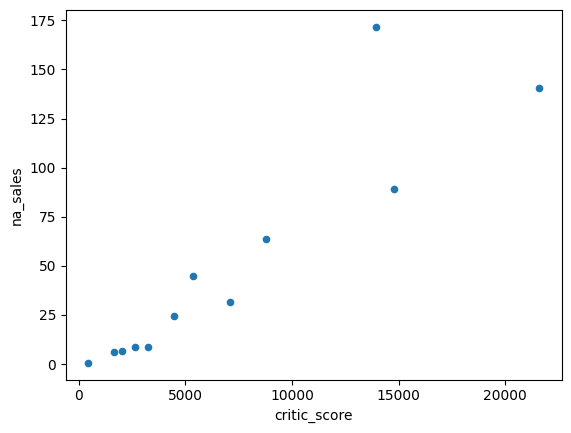

In [179]:
#tampilan scatterplot dari skor yang diberikan kritikus
wii_data.plot.scatter(y='na_sales',x='critic_score')

In [180]:
#tampilan penjulan berdasarkan wilayah Eropa
eu_data= new_data.groupby(['platform','genre']).agg({'eu_sales':'sum','user_score':'sum','critic_score': 'sum'}).reset_index().sort_values('eu_sales', ascending= False)
eu_data.head()

,platform,genre,eu_sales,user_score,critic_score
70,PS3,Action,105.95,2649.7,26782.0
128,Wii,Sports,93.78,1819.1,16749.0
150,X360,Shooter,74.50,1359.8,13957.0
142,X360,Action,73.54,2180.0,21590.0
78,PS3,Shooter,72.64,1035.8,10894.0


In [181]:
#filter data berdasarkan platform PS3
ps3_data_eu = eu_data[eu_data['platform'] == 'PS3']
ps3_data_eu

,platform,genre,eu_sales,user_score,critic_score
70,PS3,Action,105.95,2649.7,26782.0
78,PS3,Shooter,72.64,1035.8,10894.0
80,PS3,Sports,46.64,1388.8,15646.0
76,PS3,Racing,32.87,611.1,6640.0
77,PS3,Role-Playing,18.44,854.5,8496.0
73,PS3,Misc,16.16,862.4,9073.0
72,PS3,Fighting,14.11,548.7,5565.0
74,PS3,Platform,10.96,252.1,2599.0
71,PS3,Adventure,7.71,516.8,5308.0
79,PS3,Simulation,3.52,212.6,2059.0


<Axes: xlabel='user_score', ylabel='eu_sales'>

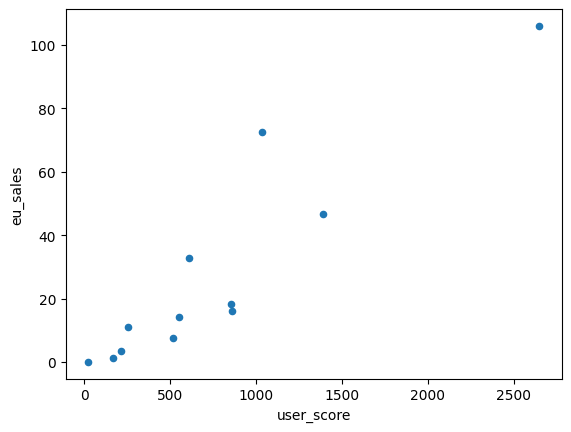

In [113]:
#tampilan scatterplot dari skor yang diberikan pengguna
wii_data_eu.plot.scatter(y='eu_sales',x='user_score')

<Axes: xlabel='critic_score', ylabel='eu_sales'>

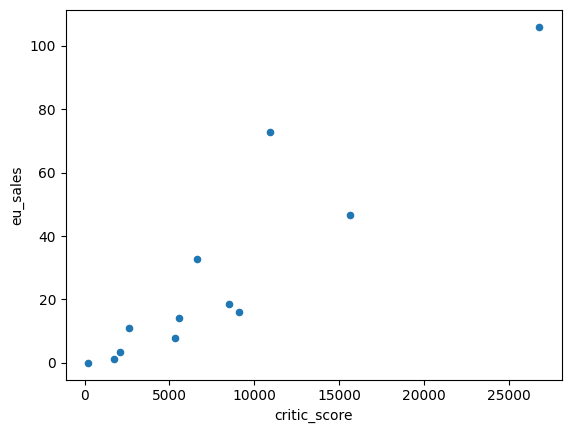

In [114]:
#tampilan scatterplot dari skor yang diberikan kritikus
wii_data_eu.plot.scatter(y='eu_sales',x='critic_score')

In [184]:
#tampilan penjulan berdasarkan wilayah Jepang
jp_data = new_data.groupby(['platform','genre']).agg({'jp_sales':'sum','user_score':'sum','critic_score': 'sum'}).reset_index().sort_values('jp_sales', ascending= False)
jp_data

,platform,genre,jp_sales,user_score,critic_score
21,DS,Role-Playing,52.91,1433.1,12931.0
7,3DS,Role-Playing,41.99,638.5,6103.0
17,DS,Misc,30.96,2716.3,24300.0
70,PS3,Action,29.65,2649.7,26782.0
101,PSP,Role-Playing,29.34,1343.5,12304.0
...,...,...,...,...,...
55,PC,Simulation,0.00,594.5,6490.0
56,PC,Sports,0.00,265.4,3414.0
57,PC,Strategy,0.00,941.1,9958.0
63,PS2,Puzzle,0.00,47.0,431.0


In [188]:
#filter data berdasarkan platform Wii 
ds_data = jp_data[jp_data['platform'] == 'DS']
ds_data.head()

,platform,genre,jp_sales,user_score,critic_score
21,DS,Role-Playing,52.91,1433.1,12931.0
17,DS,Misc,30.96,2716.3,24300.0
14,DS,Action,12.05,2298.6,20108.0
18,DS,Platform,12.04,548.9,5003.0
19,DS,Puzzle,8.42,1575.9,14213.0


<Axes: xlabel='user_score', ylabel='jp_sales'>

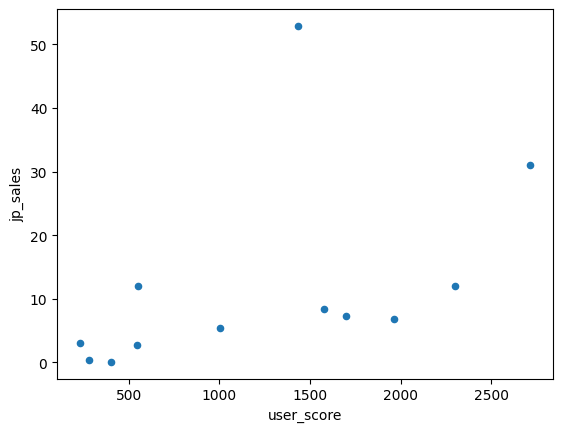

In [186]:
#tampilan scatterplot dari skor yang diberikan pengguna
ds_data.plot.scatter(y='jp_sales',x='user_score')

<Axes: xlabel='critic_score', ylabel='jp_sales'>

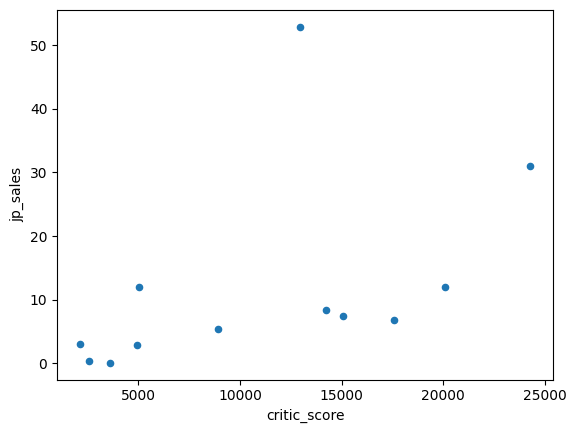

In [189]:
#tampilan scatterplot dari skor yang diberikan kritikus
ds_data.plot.scatter(y='jp_sales',x='critic_score')

In [190]:
#tampilan penjulan berdasarkan wilayah lain
other_data = new_data.groupby(['platform','genre']).agg({'other_sales':'sum','user_score':'sum','critic_score': 'sum'}).reset_index().sort_values('other_sales', ascending= False)
other_data

,platform,genre,other_sales,user_score,critic_score
70,PS3,Action,44.52,2649.7,26782.0
78,PS3,Shooter,29.06,1035.8,10894.0
128,Wii,Sports,26.79,1819.1,16749.0
150,X360,Shooter,24.48,1359.8,13957.0
142,X360,Action,21.49,2180.0,21590.0
...,...,...,...,...,...
39,GC,Misc,0.00,17.2,137.0
42,GC,Role-Playing,0.00,8.9,75.0
43,GC,Shooter,0.00,5.2,51.0
115,PSV,Simulation,0.00,30.4,284.0


In [191]:
#filter data berdasarkan platform PS3
ps3_data = other_data[other_data['platform'] == 'PS3']
ps3_data

,platform,genre,other_sales,user_score,critic_score
70,PS3,Action,44.52,2649.7,26782.0
78,PS3,Shooter,29.06,1035.8,10894.0
80,PS3,Sports,18.27,1388.8,15646.0
76,PS3,Racing,12.24,611.1,6640.0
77,PS3,Role-Playing,8.49,854.5,8496.0
73,PS3,Misc,6.61,862.4,9073.0
72,PS3,Fighting,6.56,548.7,5565.0
74,PS3,Platform,4.89,252.1,2599.0
71,PS3,Adventure,3.13,516.8,5308.0
79,PS3,Simulation,1.29,212.6,2059.0


<Axes: xlabel='user_score', ylabel='other_sales'>

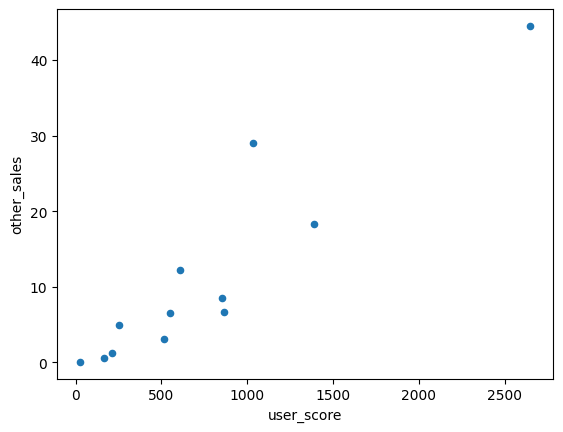

In [192]:
#tampilan scatterplot dari skor yang diberikan kritikus
ps3_data.plot.scatter(y='other_sales',x='user_score')

<Axes: xlabel='critic_score', ylabel='other_sales'>

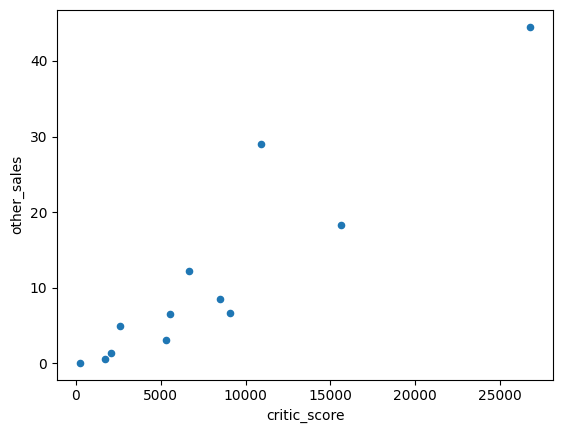

In [193]:
#tampilan scatterplot dari skor yang diberikan kritikus
ps3_data.plot.scatter(y='other_sales',x='critic_score')

# 4. Uji Hipotesis

Pada tahap terakhir adalah untuk menguji hipotesis dengan pendekatan statistik untuk studi kasus berikut akan menguji apakah platform game nilai rata-rata skor Xone sama dengan nilai rata-rata dari game PC. Pengujian selanjutnya adalah apakah nilai rata-rata skor yang diberikan pengguna kepada genre action dan sport berbeda. Untuk menguji hipotesis bahwa nilai rata-rata dari kedua sampel nilai sama maka bisa menggunakan library scipy dengan metode ttest. Ini adalah tes untuk hipotesis nol bahwa dua sampel independen memiliki nilai rata-rata (harapan) yang identik. Tes ini mengasumsikan bahwa populasi memiliki varian identik secara default. Dengan memasukan dua parameter yang ingin dibandingkan dan parameter lain yang juga perlu dimasukan adalah equal variance dimana terdapat dua pilihan True atau False. True memberikan pernyataan bahwa kedua sampel memiliki varian yang sama sedangkan False menunjukan kedua data memiliki varian berbeda.Selajutnya membuat model pengujian dengan dengan menentukan nilai alpha. Penentuan nilai alpha dilakukan berdasarkan risiko dari pengunjian yang diinginkan. Pada kasus yang meneliti dalam hal bidang industri khususnya dalam hal ini adalah industri game maka nilai alpha yang digunakan adalah 0.05. Terakhir adalah memastikan bahwa ketentuan dari nilai pvalue terhadapa nilai alpha untuk mengambil keputusan berdasarkan hipotesis yang dibuat.

In [233]:
#membuat variabel data dari platform Xone dan PC
xone_data = new_data[new_data['platform'] == 'XOne']
pc_data = new_data[new_data['platform'] == 'PC']

In [234]:
#Cek informasi
xone_data['user_score'].describe()

count    247.000000
mean       6.594737
std        1.190892
min        1.600000
25%        6.100000
50%        6.800000
75%        7.200000
max        9.200000
Name: user_score, dtype: float64

In [235]:
#cek informasi
pc_data['user_score'].describe()

count    793.000000
mean       6.968852
std        1.379760
min        1.400000
25%        6.400000
50%        7.500000
75%        7.800000
max        9.300000
Name: user_score, dtype: float64

Berdasarkan penjelasan sebelumnya bahwa metode ttest secara default hipotesis nol memiliki nilai rata-rata yang identik maka:

Hipotesis nol : nilai rata-rata skor dari pengguna  platform XOne dan PC adalah sama

Hipotesis alternatif : nilai rata-rata skor dari pengguna  platform XOne dan PC adalah  tidak sama



In [237]:
#Uji t-test

alpha = 0.05 

results = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol bahwa rata-rata rating dari pengguna platform XOne dan PC adalah sama')
else:
    print('Kita tidak dapat menolak hipotesis nol bahwa rata-rata rating dari pengguna platform XOne dan PC adalah sama')

p-value: 4.015822300144783e-05
Kita menolak hipotesis nol bahwa rata-rata rating dari pengguna platform XOne dan PC adalah sama


In [240]:
#membuat variabel data dari platform action dan sport
action_data = new_data[new_data['genre'] == 'Action']
sport_data = new_data[new_data['genre'] == 'Sports']


In [223]:
#cek informasi
action_data['user_score'].describe()

count    2420.000000
mean        7.075475
std         1.055372
min         0.300000
25%         6.900000
50%         7.300000
75%         7.600000
max         9.500000
Name: user_score, dtype: float64

In [229]:
#cek informasi
sport_data['user_score'].describe()

count    1283.000000
mean        6.851364
std         1.305745
min         0.200000
25%         6.700000
50%         7.150000
75%         7.500000
max         9.300000
Name: user_score, dtype: float64

Berdasarkan penjelasan sebelumnya bahwa metode ttest secara default hipotesis nol memiliki nilai rata-rata yang identik maka:

Hipotesis nol : nilai rata-rata skor dari pengguna  genre action dan sport adalah sama

Hipotesis alternatif : nilai rata-rata skor dari pengguna  genre action dan sport adalah  tidak sama



In [241]:
#uji test

alpha = 0.05 

results = st.ttest_ind(action_data['user_score'], pc_data['user_score'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol bahwa rata-rata rating dari pengguna genre action dan sport adalah sama')
else:
    print('Kita tidak dapat menolak hipotesis nol bahwa rata-rata rating dari pengguna genre action dan sport adalah sama')

p-value: 0.046460901135440796
Kita menolak hipotesis nol bahwa rata-rata rating dari pengguna genre action dan sport adalah sama


# 5. Kesimpulan

Kesimpulan yang bisa diambil setelah melakukan proses mulai dari perbaikan data yaitu missing value dengan melakukan penghapusan data dan imputasi untuk melengkapi nilai data yang hilang sehingga data mengalami peningkatan kualitas untuk tahap selanjutnya. Setelah melakukan persiapan data, studi kasus ini memberikan informasi mengenai tingkat penjuaan yang dibagi peformanya berdasarkan genre dan platformnya. Nilai skor yang diberikan oleh pengguna atau kritikus menunjukan sedikit korelasi terhadap penjualan games. Pada penelitian ini juga memberikan informasi mengenai bagaimana kondisi penjualan game pada wilayah Amerika Utara,Eropa, Jepan dan beberapa wilayah lain. Hasil berbeda ditunjukan dari nilai skor yang diberikan pengguna dan kritikus untuk games yang populer bahwa nilai yang mereka berikan memiliki korelasi yng cukup kuat terhadap tingkat penjuala. Dari hasil hipotesis menunjukan pengujian menolak hipotesis bahwa peringkat pengguna rata-rata dari platform Xbox One dan PC  dan pengguna rata-rata untuk genre Aksi dan Olahraga sama.